In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
from os.path import join as pjoin

In [3]:
import obr
from functionaries import *
from time_functions import stamp_Ymd
from os_functions import verify_folder_existence
from IPython.display import clear_output

In [4]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [5]:
#SOURCES_FOLDER = "mcnp_out_medial\\"
SOURCES_FOLDER = "mcnp_out_20150520\\"
FOLDER_TO_SAVE_IMAGES = pjoin(SOURCES_FOLDER, '__images', stamp_Ymd())
verify_folder_existence(FOLDER_TO_SAVE_IMAGES)

In [6]:
names_temp = [('NP0a', 'PP0a'),
              ('NP5a',  'PP5a' ),
         ('NP10a', 'PP10a'),
         ('NP15a',  'PP15a' ),
         ('NP20a', 'PP20a'),
         ('NP25a',  'PP25a'),
         ('NP30a',  'PP30a' ),
         ('NP35a',  'PP35a' ),
         ('NP40a', 'PP40a'),
         ('NP45a',  'PP45a' ),
         ('NP50a',  'PP50a' )]
#names = names_temp
names = []
for name in names_temp:
    names.append((pjoin(SOURCES_FOLDER,name[0]), pjoin(SOURCES_FOLDER, name[1])))
names = np.array(names)
names

array([['mcnp_out_20150520\\NP0a', 'mcnp_out_20150520\\PP0a'],
       ['mcnp_out_20150520\\NP5a', 'mcnp_out_20150520\\PP5a'],
       ['mcnp_out_20150520\\NP10a', 'mcnp_out_20150520\\PP10a'],
       ['mcnp_out_20150520\\NP15a', 'mcnp_out_20150520\\PP15a'],
       ['mcnp_out_20150520\\NP20a', 'mcnp_out_20150520\\PP20a'],
       ['mcnp_out_20150520\\NP25a', 'mcnp_out_20150520\\PP25a'],
       ['mcnp_out_20150520\\NP30a', 'mcnp_out_20150520\\PP30a'],
       ['mcnp_out_20150520\\NP35a', 'mcnp_out_20150520\\PP35a'],
       ['mcnp_out_20150520\\NP40a', 'mcnp_out_20150520\\PP40a'],
       ['mcnp_out_20150520\\NP45a', 'mcnp_out_20150520\\PP45a'],
       ['mcnp_out_20150520\\NP50a', 'mcnp_out_20150520\\PP50a']], 
      dtype='|S23')

mcnp_out_20150520\__images\20150602\back flow.spectrum.sample len = 5cm. mode = full.png


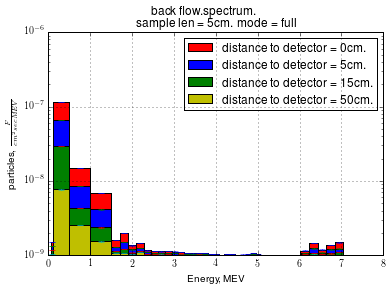

In [7]:
left, values, width = plot_sum_en_spectrum_in_back_going_flow(names[1],[0,5,15,50], ['red','blue','green','y'],pjoin(SOURCES_FOLDER, 'PP0a'),FOLDER_TO_SAVE_IMAGES)

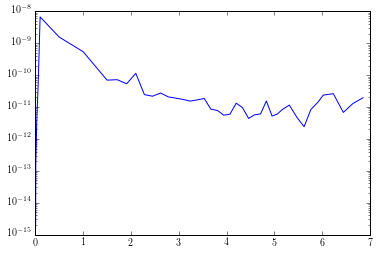

In [9]:
plt.plot(left, values)
plt.yscale('log')

In [14]:
shneider_function_coefficients = [-6.72023666e-05,
                                      6.47731559e-04,
                                      -1.13328468e-04,
                                      1.38962184e-05,
                                      -6.03541123e-07]
def shneider_function(x_arr):
    ans = np.zeros(len(x_arr))
    for power, multiplier in enumerate(shneider_function_coefficients):
        ans += np.power(x_arr, power)*multiplier
    return ans

In [21]:
shn = shneider_function(left + np.array(width)/2)

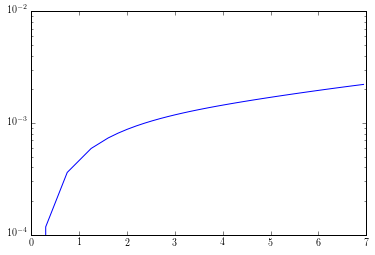

In [23]:
plt.plot(left + np.array(width)/2, shn)
plt.yscale('log')

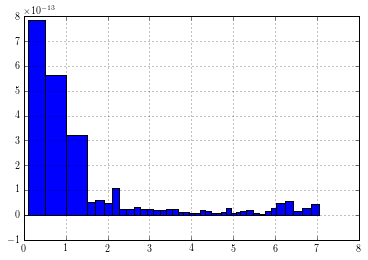

In [28]:
plt.bar(left, shn*values, width)
#plt.yscale('log')
plt.grid()